In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection,linear_model
from sklearn.metrics import r2_score
from statsmodels.graphics.mosaicplot import mosaic
import random

In [24]:
full_df=pd.read_csv("mushrooms.csv")

<Axes: >

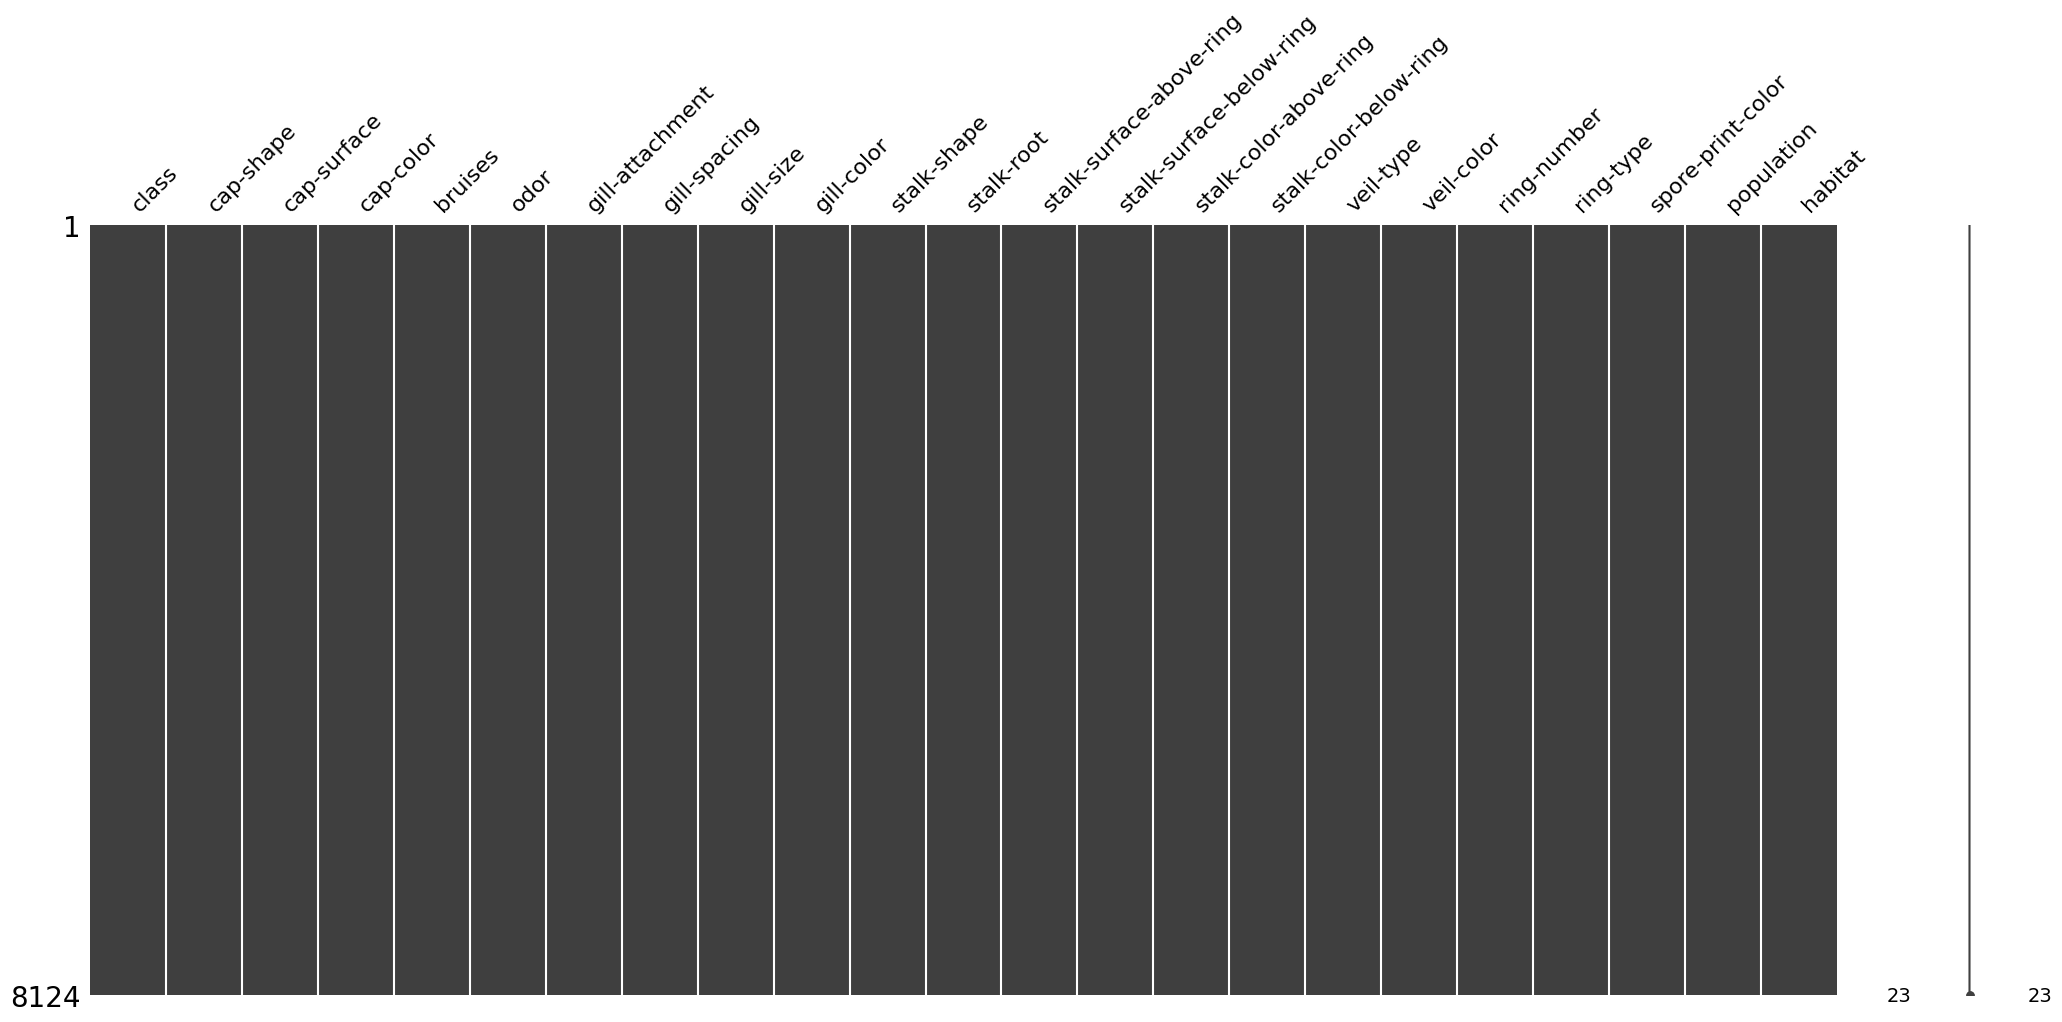

In [25]:
msno.matrix(full_df)

In [26]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [27]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6499 entries, 5953 to 6368
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     6499 non-null   object
 1   cap-shape                 6499 non-null   object
 2   cap-surface               6499 non-null   object
 3   cap-color                 6499 non-null   object
 4   bruises                   6499 non-null   object
 5   odor                      6499 non-null   object
 6   gill-attachment           6499 non-null   object
 7   gill-spacing              6499 non-null   object
 8   gill-size                 6499 non-null   object
 9   gill-color                6499 non-null   object
 10  stalk-shape               6499 non-null   object
 11  stalk-root                6499 non-null   object
 12  stalk-surface-above-ring  6499 non-null   object
 13  stalk-surface-below-ring  6499 non-null   object
 14  stalk-color-above-ring    

In [29]:
train_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5953,e,k,s,e,t,n,f,c,b,e,...,s,e,e,p,w,t,e,w,c,w
6474,p,x,s,n,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,l
7188,e,x,s,n,f,n,a,c,b,o,...,s,o,o,p,o,o,p,y,c,l
7466,p,k,y,e,f,y,f,c,n,b,...,k,w,p,p,w,o,e,w,v,l
7796,p,k,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l


In [30]:
# MORE DATA VISUALISATION HERE

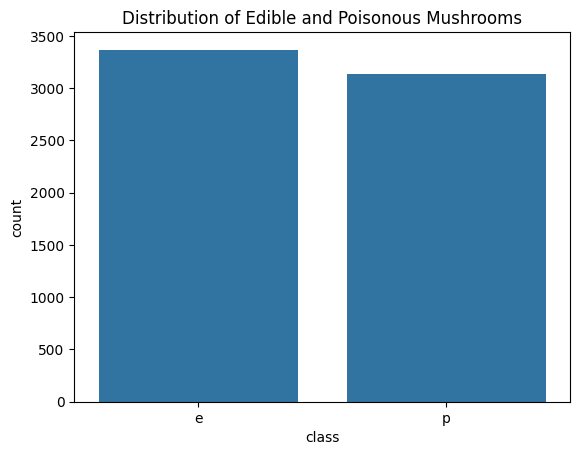

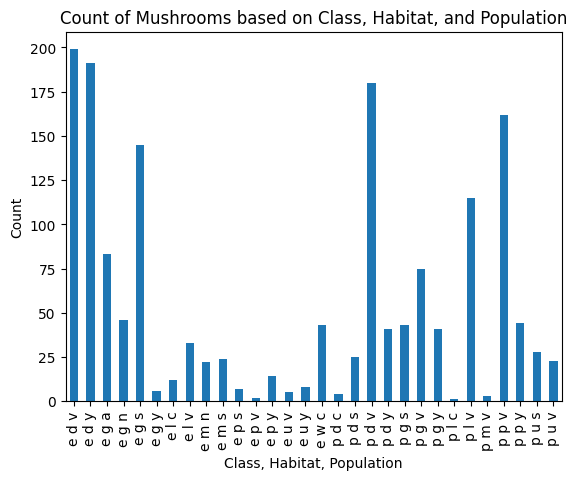

Class mapping: 
 {'e': 'edible', 'p': 'poisonous'}
Habitat mapping: 
 {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
Population mapping: 
 {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}


In [45]:
sns.countplot(x='class', data=train_df)
plt.title('Distribution of Edible and Poisonous Mushrooms')
plt.show()


class_habitat_population = test_df.groupby(['class', 'habitat', 'population']).size().reset_index(name='count')
class_habitat_population['combined'] = class_habitat_population['class'] + ' ' + class_habitat_population['habitat'] + ' ' + class_habitat_population['population']
class_habitat_population.plot(kind='bar', x='combined', y='count', legend=False)
plt.title('Count of Mushrooms based on Class, Habitat, and Population')
plt.xlabel('Class, Habitat, Population')
plt.ylabel('Count')
plt.show()

population_mapping = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
class_mapping = {'e': 'edible', 'p': 'poisonous'}
habitat_mapping = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
print('Class mapping: \n', class_mapping)
print('Habitat mapping: \n', habitat_mapping)
print('Population mapping: \n', population_mapping)




/tmp/ipykernel_4176/3153617830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data[column] = class_data[column].map(mapping[column])
/tmp/ipykernel_4176/3153617830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data[column] = class_data[column].map(mapping[column])
/tmp/ipykernel_4176/3153617830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

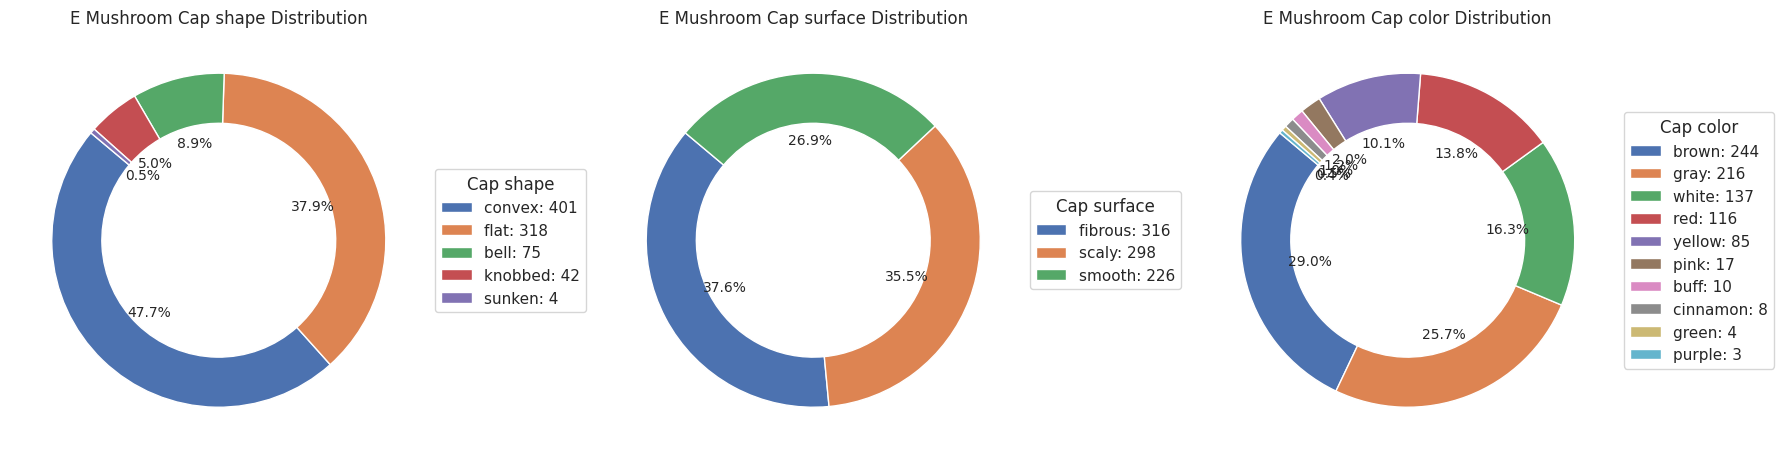

/tmp/ipykernel_4176/3153617830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data[column] = class_data[column].map(mapping[column])
/tmp/ipykernel_4176/3153617830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data[column] = class_data[column].map(mapping[column])
/tmp/ipykernel_4176/3153617830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

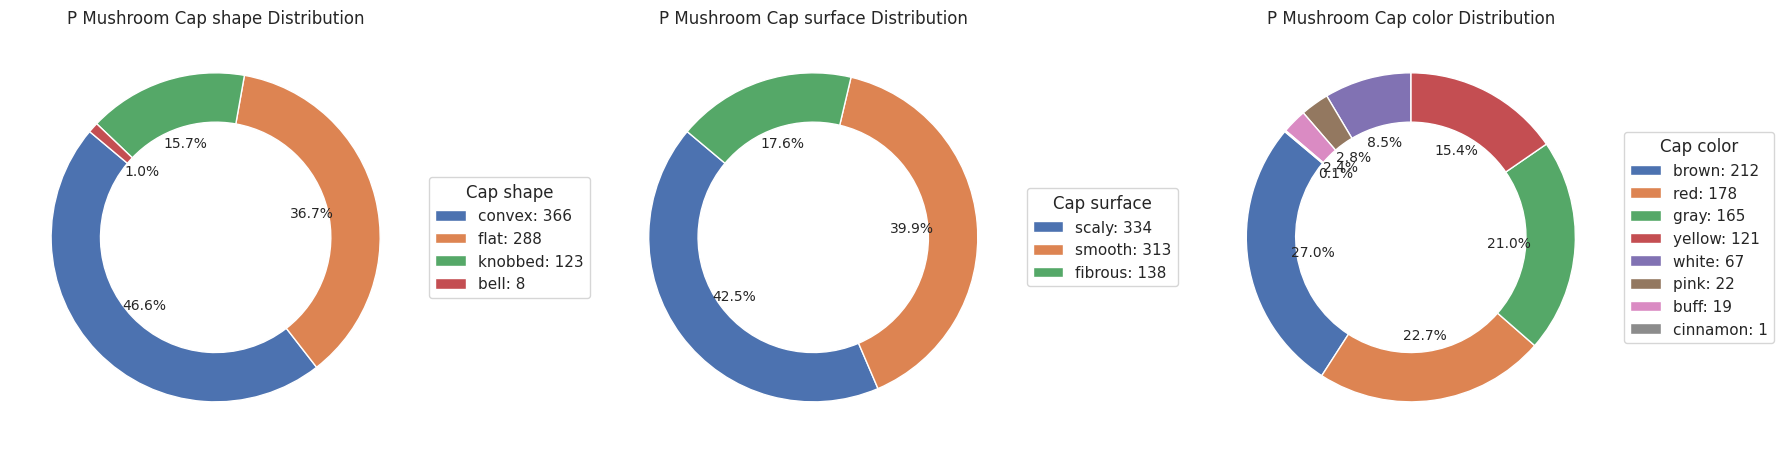

In [87]:
# WARNINGS EXPECTED. TO DISABLE USE pd.set_option('mode.chained_assignment', None) (not recommended as it suppresses all warnings about dataframe rewriting through whole code)

mushroom_data = test_df

mapping = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'u': 'purple', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
}
columns = ['cap-shape', 'cap-surface', 'cap-color']
classes = ['e', 'p']

for mushroom_class in classes:
    class_data = test_df[test_df['class'] == mushroom_class]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, column in enumerate(columns):
        class_data[column] = class_data[column].map(mapping[column])
        category_counts = class_data[column].value_counts()
        wedges, texts, autotexts = axes[i].pie(category_counts, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3), textprops=dict(size=10))
        labels = [f'{label}: {count}' for label, count in zip(category_counts.index, category_counts)]
        axes[i].legend(wedges, labels, title=column.replace('-', ' ').capitalize(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        axes[i].set_title(f'{mushroom_class.capitalize()} Mushroom {column.replace("-", " ").capitalize()} Distribution')

    plt.tight_layout()
    plt.show()


In [9]:
# MISSING DATA FILLING HERE

In [10]:
# if all data is present, inspect the data for inconsistencies, outliers or one-of-a-kind entries

In [11]:
# FEATURE SELECTION AND FEATURE ENGINEERING HERE

In [12]:
train_df = train_df.dropna()

In [13]:
# DATA CONVERSION, LABELLING, NORMALIZATION HERE

In [14]:
# NORMALIZATION MIGHT BE UNNECESSARY SINCE WE DON'T HAVE CONTINUOUS VALUES
# columns_to_normalize = ['Price', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'bhp', 'rpm power', 'Nm', 'rpm torque']

# scaler = preprocessing.MinMaxScaler()

# train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

In [ ]:
# FINAL DATA PREPROCE

In [15]:
def one_hot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
train_df = one_hot_encode(train_df, columns=['class', 'cap-shape', 'cap-color', 'cap-surface', 'bruises', 'odor', 'gill-attachment', 'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number', 'ring-type','spore-print-color','population','habitat'])

In [16]:
#FINAL DATA VISUALIZATION HERE

In [17]:
#LOGISTIC REGRESSION MODEL HERE